**Sleep Disorder Analysis**

**Load the data**

In [5]:
import pandas as pd

df = pd.read_csv("../data/Sleep_health_and_lifestyle_dataset.csv")


**Dataset Features**

In [ ]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [ ]:
df.shape

(374, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [ ]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [ ]:
categorial_columns = df.select_dtypes(include=['object']).columns

for column in categorial_columns:
    print(f"Column: {column}")
    print(df[column].value_counts())
    print("\n")

Column: Gender
Gender
Male      189
Female    185
Name: count, dtype: int64


Column: Occupation
Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64


Column: BMI Category
BMI Category
Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: count, dtype: int64


Column: Blood Pressure
Blood Pressure
130/85    99
140/95    65
125/80    65
120/80    45
115/75    32
135/90    27
140/90     4
125/82     4
132/87     3
128/85     3
126/83     2
115/78     2
139/91     2
142/92     2
119/77     2
135/88     2
129/84     2
128/84     2
131/86     2
117/76     2
130/86     2
118/75     2
121/79     1
122/80     1
118/76     1
Name: count, dtype: int64


Column: Sleep Disorder
Sleep D

**Data Cleaning**

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [ ]:
df['Sleep Disorder']=df['Sleep Disorder'].fillna('No Sleep Disorder')

In [ ]:
df=df.dropna()

In [ ]:
df=df.drop(columns=["Person ID"])

In [ ]:
df['Daily Steps']=df['Daily Steps'].fillna(df['Daily Steps'].mean())
df['Heart Rate']=df['Heart Rate'].fillna(df['Heart Rate'].mean())

In [ ]:
df[["Systolic BP","Diastolic BP"]]=df["Blood Pressure"].str.split("/",expand=True).astype(int)
df=df.drop(columns=["Blood Pressure"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Heart Rate               374 non-null    int64  
 9   Daily Steps              374 non-null    int64  
 10  Sleep Disorder           374 non-null    object 
 11  Systolic BP              374 non-null    int32  
 12  Diastolic BP             374 non-null    int32  
dtypes: float64(1), int32(2), int64(6), object(4)
memory usage: 35.2+ KB


**Data Visualization**

Sleep Duration vs. Stress level

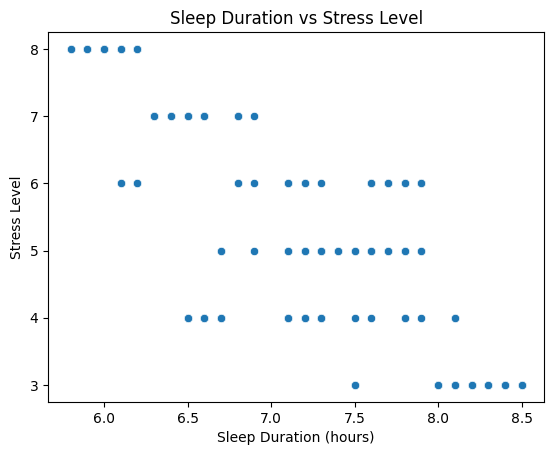

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df,x='Sleep Duration',y='Stress Level')
plt.title('Sleep Duration vs Stress Level')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Stress Level')
plt.show()

Occupation vs Stress Level

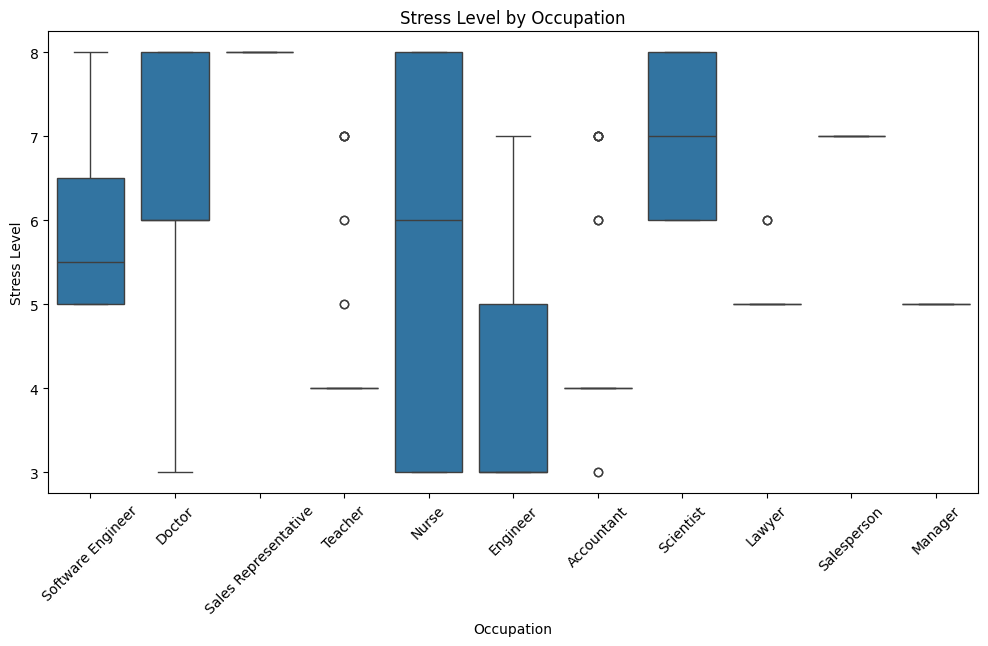

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Occupation', y='Stress Level')
plt.title('Stress Level by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Stress Level')
plt.xticks(rotation=45) 
plt.show()

Sleep Disorder vs BMI Category

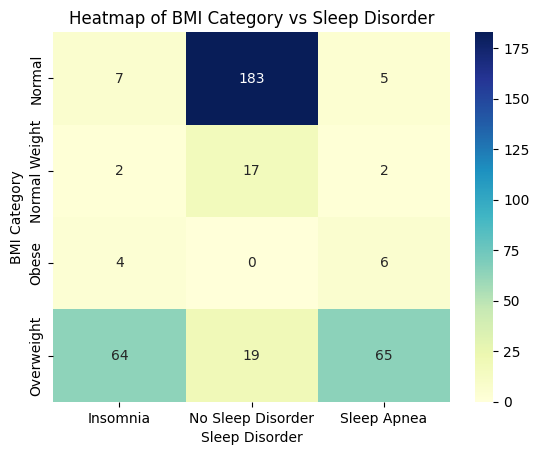

In [ ]:
crosstab=pd.crosstab(df['BMI Category'], df['Sleep Disorder'])
sns.heatmap(crosstab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of BMI Category vs Sleep Disorder')
plt.xlabel('Sleep Disorder')    
plt.ylabel('BMI Category')
plt.show()

Correlation Heatmap

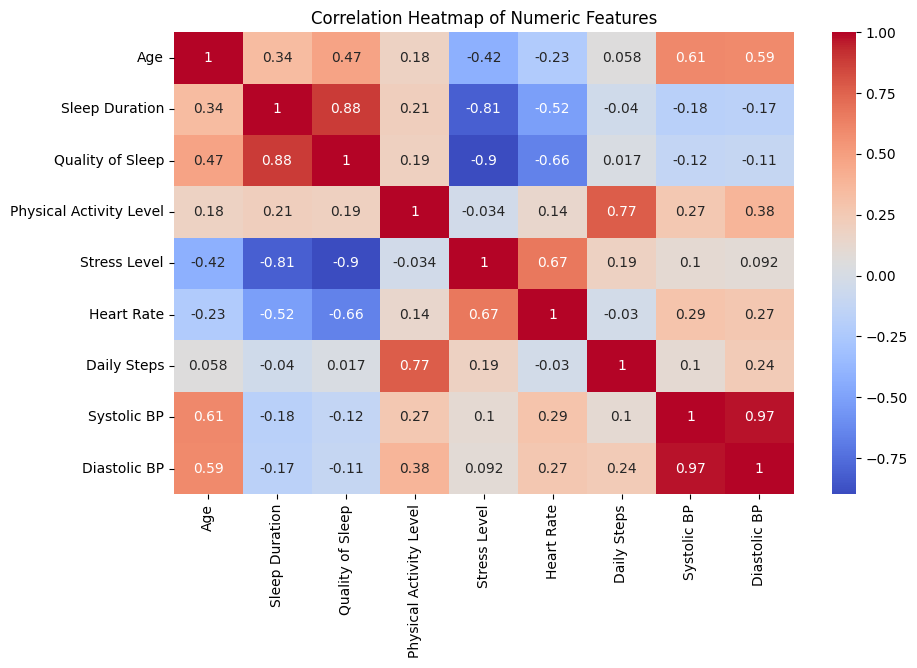

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

**Encoding Data**

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['BMI Category'] = le.fit_transform(df['BMI Category'])
df['Occupation'] = le.fit_transform(df['Occupation'])


In [ ]:
df['Sleep Disorder'] = le.fit_transform(df['Sleep Disorder'])


Feature Creation

In [ ]:
df['Sleep Efficiency'] = df['Quality of Sleep'] / df['Sleep Duration']
df['Activity Score'] = df['Physical Activity Level'] + (df['Daily Steps'] / 1000)


**Building the Random Forest Model**

Import Libraries

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

Split the Data

In [ ]:
x=df.drop(columns=['Sleep Disorder'], axis=1)
y=df['Sleep Disorder']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)

Train the Random Forest Model

In [ ]:
model=RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Make Predictions

In [ ]:
y_pred= model.predict(X_test)

Evaluate the Model

Accuracy: 0.96

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90        15
           1       1.00      0.98      0.99        44
           2       0.94      0.94      0.94        16

    accuracy                           0.96        75
   macro avg       0.94      0.95      0.94        75
weighted avg       0.96      0.96      0.96        75



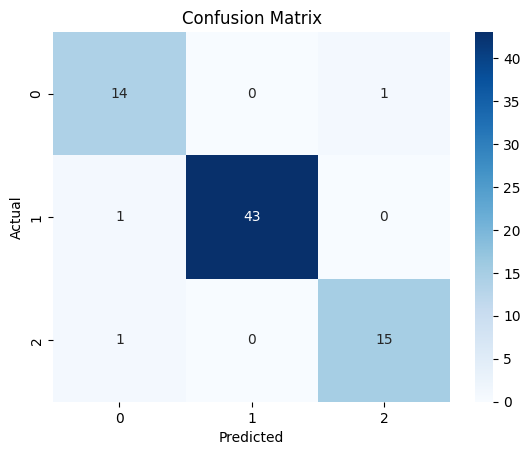

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted"
           )
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

**Hyperparameter Tuning with GridSearchCV**

Import Libraries

In [ ]:
from sklearn.model_selection import GridSearchCV


Define the Hyperparameter Grid

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


Set Up GridSearchCV

In [ ]:
rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           verbose=2,
                           scoring='accuracy')


Run the Grid Search

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy', verbose=2)

Get the Best Model

In [ ]:
best_rf = grid_search.best_estimator_

print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


Evaluate the Tuned Model

Accuracy after Hyperparameter Tuning: 0.96

Classification Report after Hyperparameter Tuning:
               precision    recall  f1-score   support

           0       0.93      0.87      0.90        15
           1       1.00      1.00      1.00        44
           2       0.88      0.94      0.91        16

    accuracy                           0.96        75
   macro avg       0.94      0.93      0.94        75
weighted avg       0.96      0.96      0.96        75



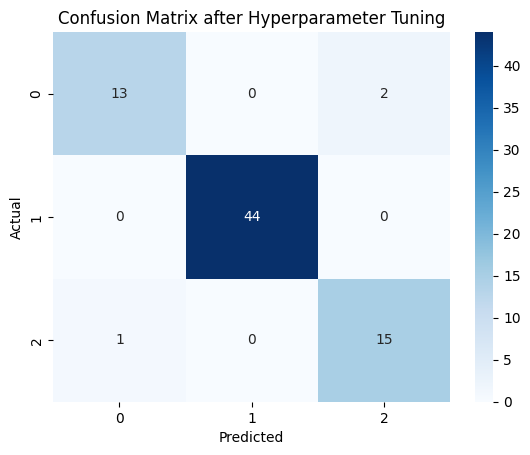

In [ ]:
y_pred=best_rf.predict(X_test)
print("Accuracy after Hyperparameter Tuning:", accuracy_score(y_test, y_pred))
print("\nClassification Report after Hyperparameter Tuning:\n", classification_report(y_test, y_pred))
# Confusion Matrix after Hyperparameter Tuning
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix after Hyperparameter Tuning")
plt.show()

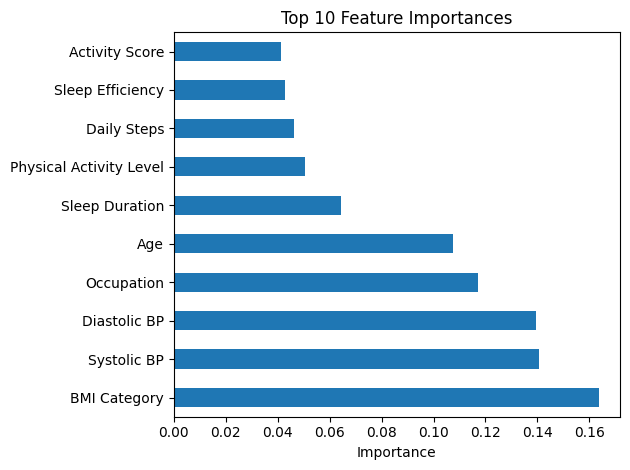

In [ ]:
feature_importances = pd.Series(best_rf.feature_importances_, index=x.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()